The provided code is importing several libraries and modules in a Python script. Let's go through each import statement:

1. `import numpy as np`: This imports the NumPy library and assigns it the alias `np`. NumPy is a powerful library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

2. `import tensorflow as tf`: This imports the TensorFlow library and assigns it the alias `tf`. TensorFlow is an open-source machine learning framework that allows you to build and train various types of machine learning models, including neural networks. It provides a flexible and efficient way to define, optimize, and execute computational graphs.

3. `import tensorflow_probability as tfp`: This imports the TensorFlow Probability library and assigns it the alias `tfp`. TensorFlow Probability is an extension of TensorFlow that provides tools for probabilistic modeling and statistical inference. It allows you to define and train models that incorporate uncertainty and make probabilistic predictions.

4. `from tensorflow.keras import layers`: This imports the `layers` module from the `tensorflow.keras` package. Keras is a high-level neural networks API that is integrated into TensorFlow. The `layers` module provides a collection of pre-built layers that can be used to construct neural networks.

5. `from tensorflow.keras.models import Model`: This imports the `Model` class from the `tensorflow.keras.models` module. The `Model` class is a fundamental component of Keras and represents a neural network model. It allows you to define the architecture of a model by assembling layers and provides methods for training, evaluation, and prediction.

By importing these libraries and modules, the script gains access to a wide range of functions, classes, and tools for building and training neural networks and performing numerical computations.


In [38]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [39]:
# Read the CSV file
import pandas as pd
file_name = "req_time_x"
file_path = "C:/Users/adity/OneDrive/Desktop/Sixth Semester/CE6018 Seismic Data Analytics/Program/Week7/ReqResampleData/req_resampled_freq_x.csv"
reqData = pd.read_csv(file_path)

reqData
for i in reqData.columns:
    print(i)

RSN
0.401606426
0.903614458
1.40562249
1.907630522
2.409638554
2.911646586
3.413654618
3.915662651
4.417670683
4.919678715
5.421686747
5.923694779
6.425702811
6.927710843
7.429718876
7.931726908
8.43373494
8.935742972
9.437751004
9.939759036
10.44176707
10.9437751
11.44578313
11.94779116
12.4497992
12.95180723
13.45381526
13.95582329
14.45783133
14.95983936
15.46184739
15.96385542
16.46586345
16.96787149
17.46987952
17.97188755
18.47389558
18.97590361
19.47791165
19.97991968
20.48192771
20.98393574
21.48594378
21.98795181
22.48995984
22.99196787
23.4939759
23.99598394
24.49799197
25
Earthquake Magnitude
Hypocenter Depth (km)
Joyner-Boore Dist. (km)
Vs30 (m/s) selected for analysis
PGA (g)
PGV (cm/sec)
T0.010S
T0.020S
T0.022S
T0.025S
T0.029S
T0.030S
T0.032S
T0.035S
T0.036S
T0.040S
T0.042S
T0.044S
T0.045S
T0.046S
T0.048S
T0.050S
T0.055S
T0.060S
T0.065S
T0.067S
T0.070S
T0.075S
T0.080S
T0.085S
T0.090S
T0.095S
T0.100S
T0.110S
T0.120S
T0.130S
T0.133S
T0.140S
T0.150S
T0.160S
T0.170S
T0.180S
T

In [40]:
# Define the input features and output columns
X_val = ["Earthquake Magnitude",
         "Hypocenter Depth (km)", "Joyner-Boore Dist. (km)", "Vs30 (m/s) selected for analysis"]
Xreq = reqData[X_val]

# Create a new DataFrame with the selected columns

# Y_val=["0.401606426", "0.903614458", "1.40562249", "1.907630522", "2.409638554", "2.911646586", "3.413654618", "3.915662651", "4.417670683", "4.919678715", "5.421686747", "5.923694779", "6.425702811", "6.927710843", "7.429718876", "7.931726908", "8.43373494", "8.935742972", "9.437751004", "9.939759036", "10.44176707", "10.9437751", "11.44578313", "11.94779116", "12.4497992", "12.95180723", "13.45381526", "13.95582329", "14.45783133", "14.95983936", "15.46184739", "15.96385542", "16.46586345", "16.96787149", "17.46987952", "17.97188755", "18.47389558", "18.97590361", "19.47791165", "19.97991968", "20.48192771", "20.98393574", "21.48594378", "21.98795181", "22.48995984", "22.99196787", "23.4939759", "23.99598394", "24.49799197", "25"
#                ]
Y_val="T0.010S"
Yreq = reqData[Y_val]
Yreq

0        0.047520
1        0.040997
2        0.018463
3        0.122490
4        0.234620
           ...   
14080    0.002038
14081    0.000652
14082    0.000432
14083    0.000371
14084    0.000007
Name: T0.010S, Length: 14085, dtype: float64

This code snippet is splitting data into train and test sets. Let's break it down step by step:

1. The variable `split` is calculated as 80% of the length of the data `X`. This will determine the index at which the data will be split.
2. The data `X` is split into two parts: `X_train` and `X_test`. The first part, `X_train`, contains the data from index 0 to `split-1`, while the second part, `X_test`, contains the data from index `split` to the end of the data.
3. Similarly, the target variable `y` is split into `y_train` and `y_test` using the same indices as `X_train` and `X_test`.

In summary, this code is performing a simple train-test split, where 80% of the data is used for training and 20% is used for testing. The variables `X_train`, `X_test`, `y_train`, and `y_test` will hold the respective portions of the data for further processing or analysis.


In [41]:
# Split data into train and test sets
# Normalizing the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
X_normalized = scalerX.fit_transform(Xreq)
Y_normalized = scalerY.fit_transform(Yreq.values.reshape(-1, 1))
# Y_normalized = scalerY.fit_transform(Yreq)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
X_normalized, Y_normalized, test_size=0.2, random_state=42)

This code defines a function called `build_model` that constructs a neural network model using the Keras library. The function takes an `input_shape` parameter, which specifies the shape of the input data.

Here's a step-by-step breakdown of the code:

1. The function starts by creating an input layer using `tf.keras.Input`. The `shape` parameter is set to `(input_shape,)`, which means the input data is expected to have `input_shape` dimensions.

2. The input layer is then passed through a dense layer with 64 units and a ReLU activation function. The `layers.Dense` function is used to create this layer. The output of this layer is assigned to the variable `x`.

3. A dropout layer is added after the first dense layer. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training, which helps prevent overfitting. The `layers.Dropout` function is used to create this layer. The dropout rate is set to 0.5, meaning 50% of the input units will be randomly set to 0 during training.

4. Another dense layer with 64 units and a ReLU activation function is added after the dropout layer. The output of this layer is assigned to the variable `x`.

5. Another dropout layer is added after the second dense layer.

6. Finally, a dense layer with 1 unit and a linear activation function is added. This layer serves as the output layer for regression tasks. The output of this layer is assigned to the variable `outputs`.

7. The `Model` function is used to create the final model. It takes the input layer (`inputs`) and the output layer (`outputs`) as arguments. The resulting model is assigned to the variable `model`.

8. The function returns the created model.

This code defines a simple neural network model with two dense layers and two dropout layers. It is commonly used for regression tasks, where the goal is to predict a continuous value.


In [42]:
# Define Bayesian neural network architecture
def build_model(input_shape):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    # outputs = layers.Dense(50, activation='linear')(x)  # 1 unit for regression
    outputs = layers.Dense(1, activation='linear')(x)  # 1 unit for regression
    model = Model(inputs, outputs)
    return model

The provided code defines a custom loss function called `negative_log_likelihood` for variational inference in regression. Let's break it down step by step:

1. The function takes two parameters: `y_true` and `y_pred`. These parameters represent the true values (`y_true`) and the predicted values (`y_pred`) for the regression problem.

2. Inside the function, a probability distribution object is created using the `tfp.distributions.Normal` class from the TensorFlow Probability library. This distribution represents a normal distribution with a mean equal to `y_pred` and a constant variance of 1.

3. The negative log-likelihood is then calculated using the `log_prob` method of the distribution object. The negative log-likelihood measures the discrepancy between the true values and the predicted values, with a lower value indicating a better fit.

4. Finally, the negative log-likelihood is averaged over all the samples using the `reduce_mean` function from TensorFlow. This provides a single scalar value that represents the overall performance of the model.

The purpose of this custom loss function is to guide the training process of a regression model using variational inference. By minimizing the negative log-likelihood, the model aims to improve its predictions and fit the true values more accurately.

It's worth noting that the assumption of a constant variance of 1 may not always be appropriate for all regression problems. Depending on the specific requirements of your problem, you may need to modify this code to use a different variance or distribution.


In [43]:
# Custom loss function for variational inference in regression
def negative_log_likelihood(y_true, y_pred):
    dist = tfp.distributions.Normal(
        loc=y_pred, scale=1)  # Assume constant variance
    return -tf.reduce_mean(dist.log_prob(y_true))

This code defines a function `prior` that creates a prior distribution for the weights of a Bayesian neural network. Here's a breakdown:

1. `def prior(kernel_size, bias_size, dtype=None):` This line defines the function `prior` which takes three arguments: `kernel_size`, `bias_size`, and `dtype`. `kernel_size` and `bias_size` are the sizes of the weights and biases of a layer in the neural network, respectively. `dtype` is the data type of the elements of the created TensorFlow tensor.

2. `n = kernel_size + bias_size` This line calculates the total size of the weights and biases for a layer in the neural network.

3. `return lambda t: tfd.Normal(loc=tf.zeros(n, dtype=dtype), scale=1.0)` This line returns a lambda function that, when called, returns a Normal distribution object. This Normal distribution has a mean (`loc`) of 0 (a tensor of zeros of size `n` is created using `tf.zeros(n, dtype=dtype)`) and a standard deviation (`scale`) of 1. This Normal distribution represents the prior belief about the weights and biases before seeing any data. In this case, the prior belief is that the weights


In [44]:

# Define prior for weight distributions
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    return lambda t: tfd.Normal(loc=tf.zeros(n, dtype=dtype), scale=1.0)

The provided code is a function called `posterior` that defines the posterior distribution for weight distributions in a neural network. Let's break down the code step by step:

1. The function `posterior` takes three arguments: `kernel_size`, `bias_size`, and `dtype`. These arguments specify the sizes of the kernel (weight) and bias tensors, as well as the data type of the variables.

2. Inside the function, a variable layer is created using `tfp.layers.VariableLayer`. This layer is responsible for creating trainable variables for the weight distributions. The `params_size` method of `MultivariateNormalTriL` is used to determine the number of parameters needed for the weight distributions based on the sum of `kernel_size` and `bias_size`. The `dtype` argument is passed to specify the data type of the variables.

3. Next, a `MultivariateNormalTriL` layer is created using `tfp.layers.MultivariateNormalTriL`. This layer represents a multivariate normal distribution with a lower triangular covariance matrix. The number of dimensions for the distribution is set to `n`, which is the sum of `kernel_size` and `bias_size`. The `activity_regularizer` argument is set to `tfp.layers.KLDivergenceRegularizer`, which calculates the Kullback-Leibler (KL) divergence between the posterior distribution and a prior distribution. The `weight` argument is set to 1, indicating that the KL divergence regularization should be applied with a weight of 1.

4. Finally, the two layers are combined into a `tf.keras.Sequential` model, which represents a sequence of layers. The model is returned as the output of the `posterior` function.

In summary, the `posterior` function creates a model that represents the posterior distribution for weight distributions in a neural network. This distribution is used to regularize the weights during training by applying the Kullback-Leibler divergence regularization.


In [45]:

# Define posterior for weight distributions
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(
            tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype),
        tfp.layers.MultivariateNormalTriL(
            n, activity_regularizer=tfp.layers.KLDivergenceRegularizer(prior, weight=1)),
    ])

In [46]:


# Create Bayesian neural network
model = build_model(X_train.shape[1])
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:

# Convert model to Bayesian by using Variational Layers
tfd = tfp.distributions
batch_size = 32

model.compile(loss=negative_log_likelihood,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [48]:

# Mean Absolute Error as metric for regression

# Train the Bayesian neural network
history = model.fit(X_train, y_train, epochs=500,
                    batch_size=batch_size, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Epoch 1/500


282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9443 - mae: 0.1524 - val_loss: 0.9202 - val_mae: 0.0232
Epoch 2/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9206 - mae: 0.0334 - val_loss: 0.9202 - val_mae: 0.0259
Epoch 3/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9202 - mae: 0.0268 - val_loss: 0.9202 - val_mae: 0.0269
Epoch 4/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9203 - mae: 0.0273 - val_loss: 0.9201 - val_mae: 0.0268
Epoch 5/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9203 - mae: 0.0273 - val_loss: 0.9201 - val_mae: 0.0274
Epoch 6/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9201 - mae: 0.0263 - val_loss: 0.9201 - val_mae: 0.0278
Epoch 7/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9202 - mae: 0.0274 - val_loss: 0.9201 - val_mae: 0.0263
Epoch 8/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9202 - mae: 0.0265 - val_loss: 0.9201 - val_mae: 0.0265
Epoch 9/500
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

Text(0.5, 0, 'Epoch')

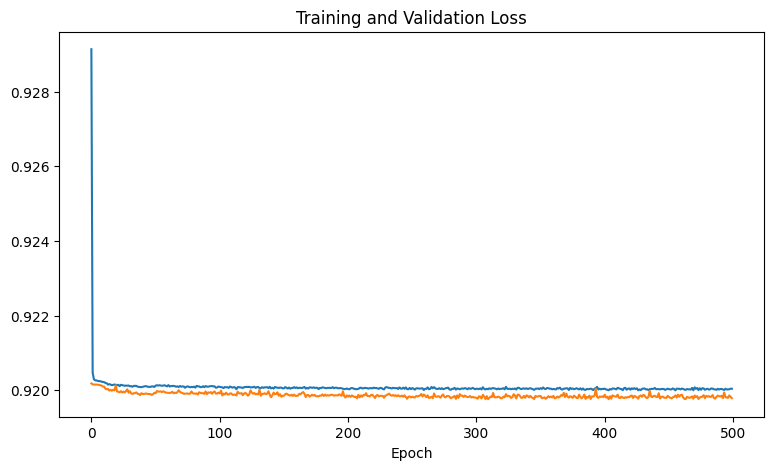

In [49]:
# Plot training and validation loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

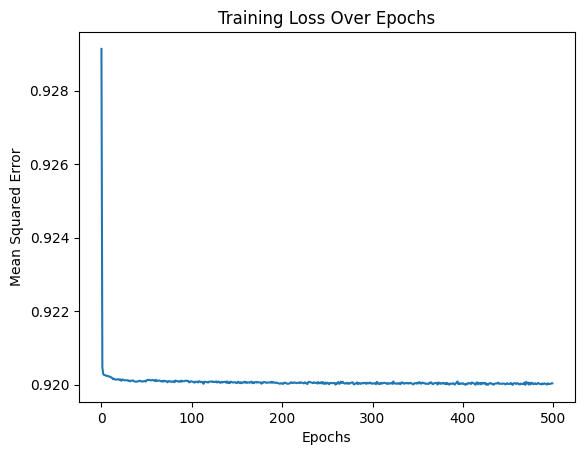

In [50]:
plt.plot(history.history['loss'])
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [51]:
prediction = model.predict(X_test)
prediction

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step


array([[0.02175388],
       [0.04035895],
       [0.01766905],
       ...,
       [0.01886513],
       [0.03965862],
       [0.01877037]], dtype=float32)

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
rsquared = r2_score(y_test, prediction)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", rsquared)

Mean Absolute Error (MAE): 0.022418052371088907
Mean Squared Error (MSE): 0.0023923244982281466
Root Mean Squared Error (RMSE): 0.04891139435988456
R-squared: 0.2280323094430008


In [53]:

# Assuming you have a MinMaxScaler object named scalerX
# original_Y_test = scalerY.inverse_transform(prediction)
# original_Y_test

import matplotlib.pyplot as plt

# Convert the predicted values to their original scale
# original_Y_test = scalerY.inverse_transform(prediction)
predictions = model.predict(X_test)

# predictions_df= pd.DataFrame(np.array(predictions),columns=Yreq)
# Fseries=list(predictions_df.columns)
# print(len(Fseries))

# Plot predictions vs actual values
# plt.figure(figsize=(12, 6))
# for i in range(len(Y_val)):
#     plt.scatter(y_test[:, i], predictions[:, i], label=Y_val[i])
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.xscale("log")
# plt.yscale("log")
# plt.title('Predictions vs Actual Values')
# plt.legend()
# plt.show()


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
